In [1]:
import numpy as np

import amstrax
import strax

In [2]:
import numpy as np
7e-3 * np.ones(10)

array([0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007,
       0.007])

In [3]:
# !rm -rf ./strax_data/

In [4]:
!rm -rf ./strax_data/*peaks*

In [5]:
# run_id = '180314_123304'
run_id = '180314_122555'

In [6]:
st = strax.Context(storage=strax.DataDirectory('./strax_data'),
#                   register=[amstrax.RecordsFromPax, amstrax.Records, amstrax.Peaks],
                    register_all=amstrax,
                   config=dict(pax_raw_dir='/data/xenon/xams/run9/raw/data/'))

In [7]:
st.make(run_id, 'raw_records')

In [8]:
# Load a subset of raw records by time
# t0 = 1521030355007293002
# rr = st.get_array(run_id, 'raw_records', time_range=(t0, t0 + int(1e6)))
# # st.get_meta(run_id, 'raw_records')s

In [9]:
peaks = st.get_array(run_id, 'peaks', config=dict(min_hits=2))

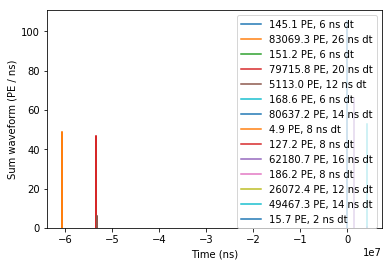

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def plot_peaks(main_i, n_before=0, n_after=0, label_threshold=0):
    for i in main_i + np.arange(-n_before, n_after + 1):
        p = peaks[i]
        label = None
        if p['area'] > label_threshold:
            label = '%.1f PE, %d ns dt' % (p['area'], p['dt'], )
        plot_peak(p,
                  t0=peaks[main_i]['time'],
                  label=label)
    plt.ylim(0, None)
    plt.legend(loc='upper right')
    #plt.yscale('symlog')

def plot_peak(p, t0=None, **kwargs):
    n = p['length']
    if t0 is None:
        t0 = p['time']
    plt.plot((p['time'] - t0) + np.arange(n) * p['dt'],
             p['data'][:n] / p['dt'],
             linestyle='steps-mid',
             **kwargs)
    plt.xlabel("Time (ns)")
    plt.ylabel("Sum waveform (PE / ns)")


plot_peaks(444, n_after=10, n_before=10
          )


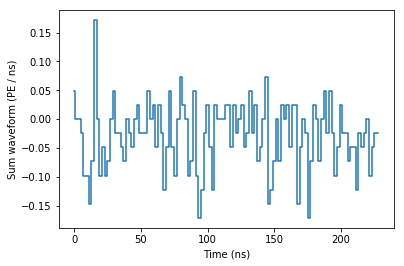

In [20]:
p  = peaks[200]

plot_peak(peaks[22234
               ])

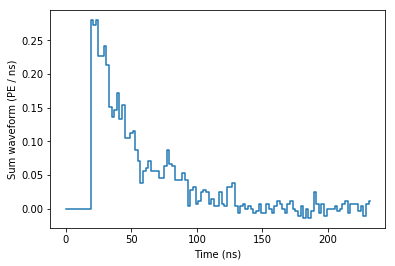

In [16]:
plot_peak(peaks[3])

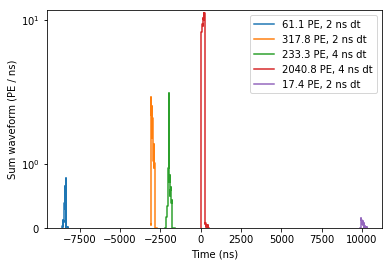

In [15]:
plot_peaks(12021, n_after=1, n_before=3)

In [11]:
np.argmax(peaks['area'])

12021

In [10]:
records['data']

array([[-4, -2,  4, ..., -1,  0, -2],
       [ 1,  0,  1, ..., -3,  2,  1],
       [-3,  1, -3, ..., -5, -2, -2],
       ...,
       [-1,  2,  1, ...,  0,  1,  2],
       [ 4,  2, -2, ..., -3,  3, -2],
       [ 2,  2,  2, ...,  1,  0, -2]], dtype=int16)

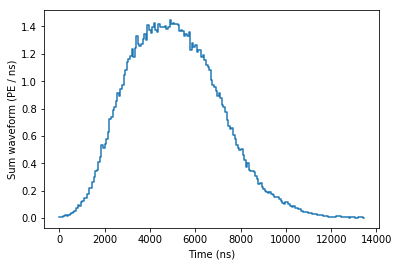